_____
# Audio Source Separation Lab
## BITTENCOURT Gabriela
## VELANDIA Brayam
_____

In [6]:
!pip install mdct

In [7]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.signal import hamming
from scipy.spatial.distance import cdist

import IPython.display as ipd
from mdct.fast import mdct, imdct

plt.rcParams['figure.figsize'] = (12,8)

In [8]:
# useful functions

def plot_sound(data, rate, title=None):
    if data.ndim == 1:
        data = data[:,np.newaxis]
    times = np.arange(data.shape[0])/rate
    plt.figure(figsize=(30,6))
    for channel in data.T:
        plt.fill_between(times, channel)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xlim(times[0], times[-1])
    if title:
        plt.title(title)
    plt.show()
    
def play_sound(data, rate):
    return ipd.Audio(data.T, rate=rate)

## Part 1

Three instruments, bass(left), guitar(right) and piano (both)

T = 220501, M = 2


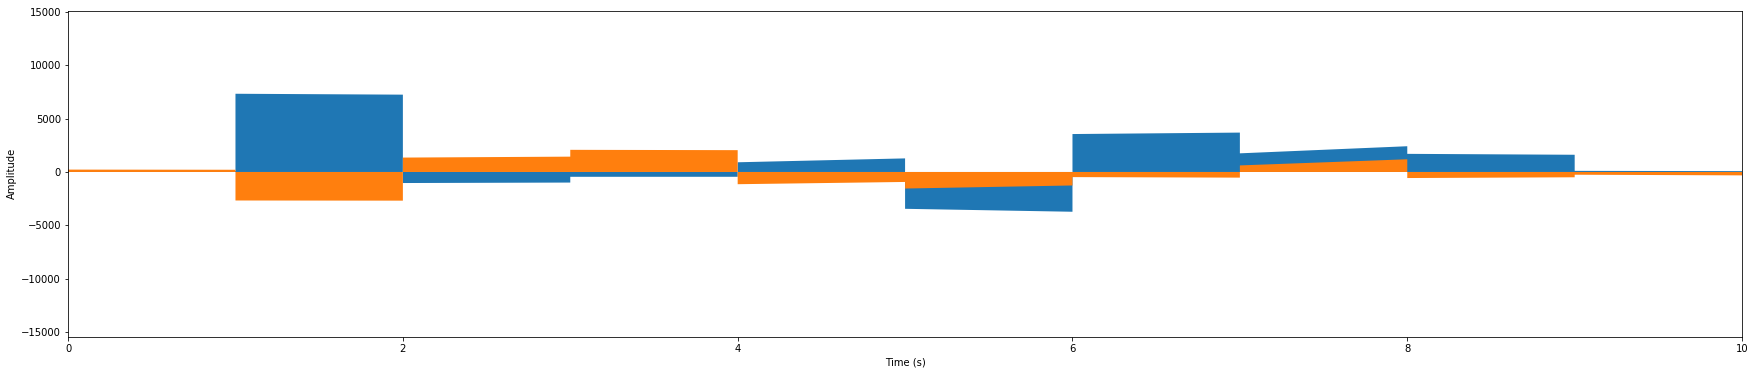

In [9]:
fname = 'mix.wav'
rate, x = wavfile.read(fname)
print('T = {:d}, M = {:d}'.format(*x.shape))
plot_sound(x, rate)
play_sound(x, rate)

## Part 2

We can not identify the directions of the sources.

(-11025.0, 231525.0, -15453.0, 15127.0)

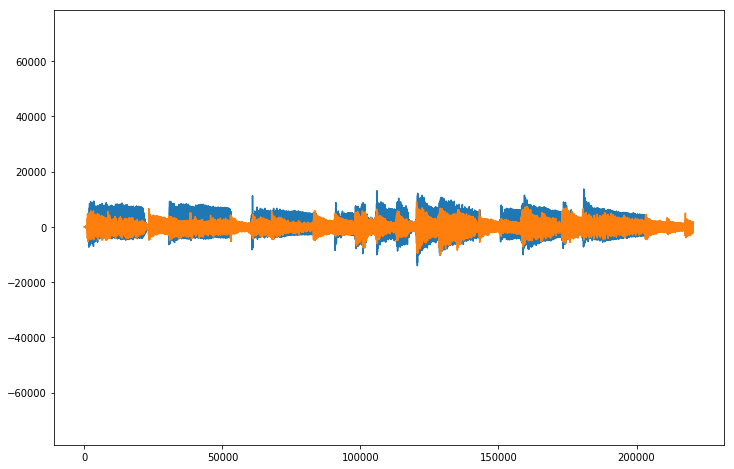

In [10]:
plt.plot(x)
plt.axis('equal')

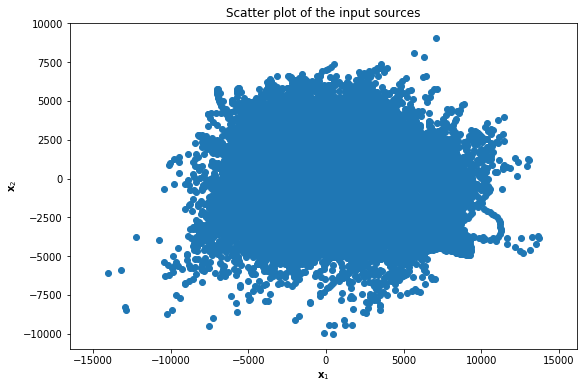

In [11]:
fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.title('Scatter plot of the input sources')
plt.plot(x[:,0], x[:,1], 'C0o')
plt.xlabel("$\mathbf{x}_1$")
plt.ylabel("$\mathbf{x}_2$")
plt.axis('equal');

## Part 3

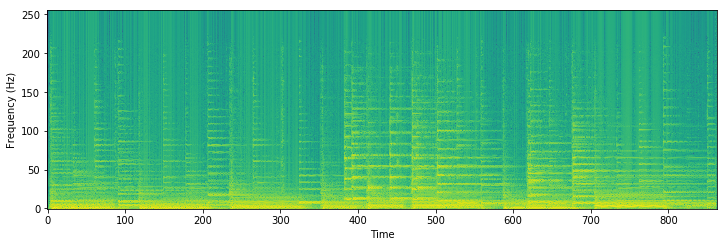

In [99]:
X = mdct(x, window=hamming, framelength=512)
Z = X.view(dtype=np.complex128)[...,0]

X_norm = np.abs(Z)**2

plt.imshow(np.log(X_norm+1e-10), origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()

## Part 4

In this part we can differenciate the three sources, this is because after we apply the MDCT we obtain a matrix with the angles of each point. This matrix Z is used to classify the sources depending on the angle of the Z value in the imaginary domain.

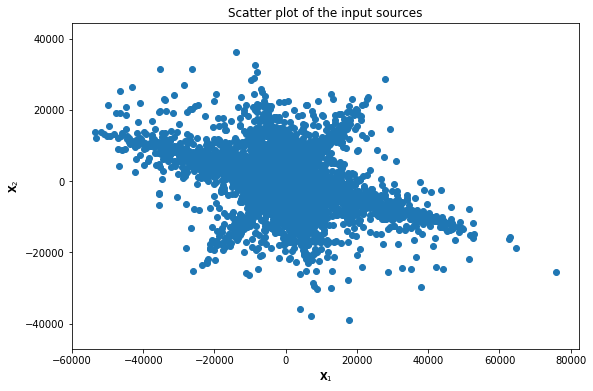

In [13]:
fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.title('Scatter plot of the input sources')
plt.plot(np.real(Z), np.imag(Z), 'C0o')
plt.xlabel("$\mathbf{X}_1$")
plt.ylabel("$\mathbf{X}_2$")
plt.axis('equal');

##Part 5

Here we plot the histogram of the arguments of the points of affix Z(f,n). we can estimate the angles $\theta(k)$ graphically from the histogram, where we obtain $\theta(1)= -1.42 $, $\theta(2)= 0.23 $ and $\theta(3)=1.42$.

/usr/local/lib/python2.7/dist-packages/numpy/lib/histograms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python2.7/dist-packages/matplotlib/transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python2.7/dist-packages/matplotlib/transforms.py:2052: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


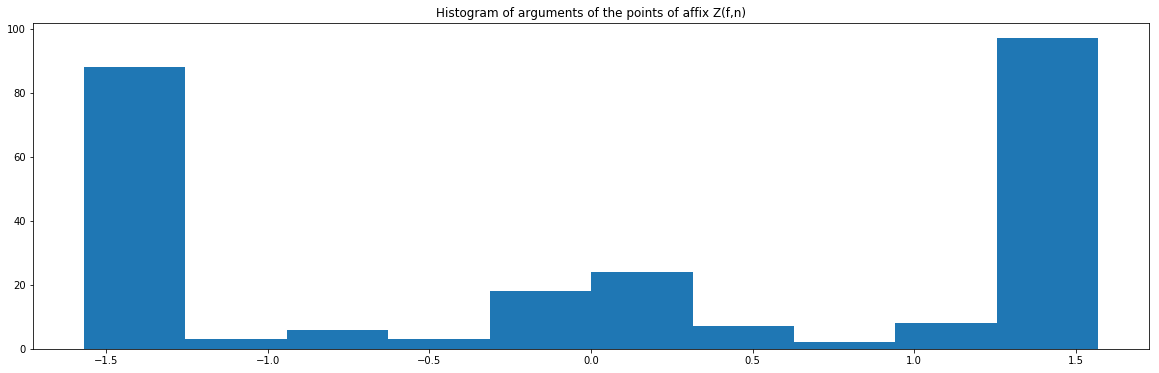

In [14]:
Z_arctan = np.arctan(Z)
fig = plt.figure(figsize=(20, 6))
plt.title('Histogram of arguments of the points of affix Z(f,n)')
plt.hist(Z_arctan[:,1])
plt.show()

##Part 6

In [15]:
Z_angles=np.angle(Z[:])
angles= np.arctan(Z_angles)

In [17]:
angles.shape
F,N=256,863

In [115]:
B = np.zeros((F,N,3))
theta=np.array([-1.42,0.23,1.42])
inst1=0
inst2=0
inst3=0


for f in range(F):
  for n in range(N):
    for k in range(3):
      dev_mes=np.abs(np.sin(theta[k]-angles[f,n]))
      if 0<=dev_mes<0.33:
        B[f,n,:]=[1,0,0]
        inst1+=1
      elif 0.33<=dev_mes<0.66:
        B[f,n,:]=[0,1,0]
        inst2+=1
      else:
        B[f,n,:]=[0,0,1]
        inst3+=1

Part 7

In [90]:
X.shape

(256, 863, 2)

In [91]:
B.shape

(256, 863, 3)

In [95]:
B[2,2,1]

0.0

In [116]:
Y= np.zeros((F,N,2,3))

for f in range(F):
  for n in range(N):
    for k in range(3):
      for m in range(2):
        Y[f,n,m,k]= X[f,n,m]*B[f,n,k]


In [117]:
y1=imdct(Y[:,:,:,0], framelength=512)
y2=imdct(Y[:,:,:,1], framelength=512)
y3=imdct(Y[:,:,:,2], framelength=512)

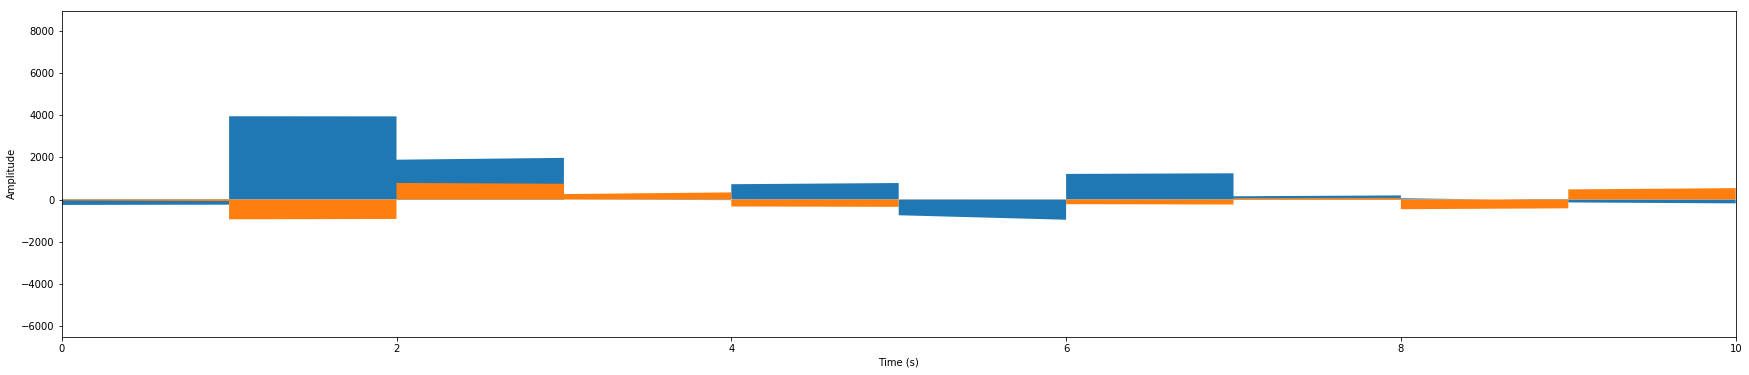

In [118]:
plot_sound(y1, rate)
play_sound(y1, rate)

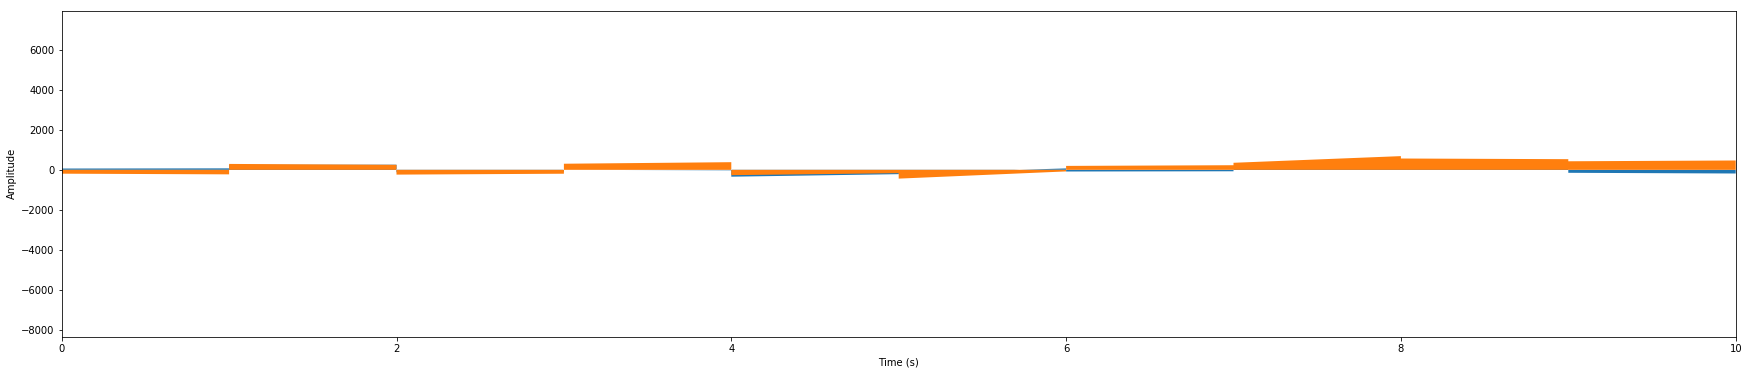

In [113]:
plot_sound(y2, rate)
play_sound(y2, rate)

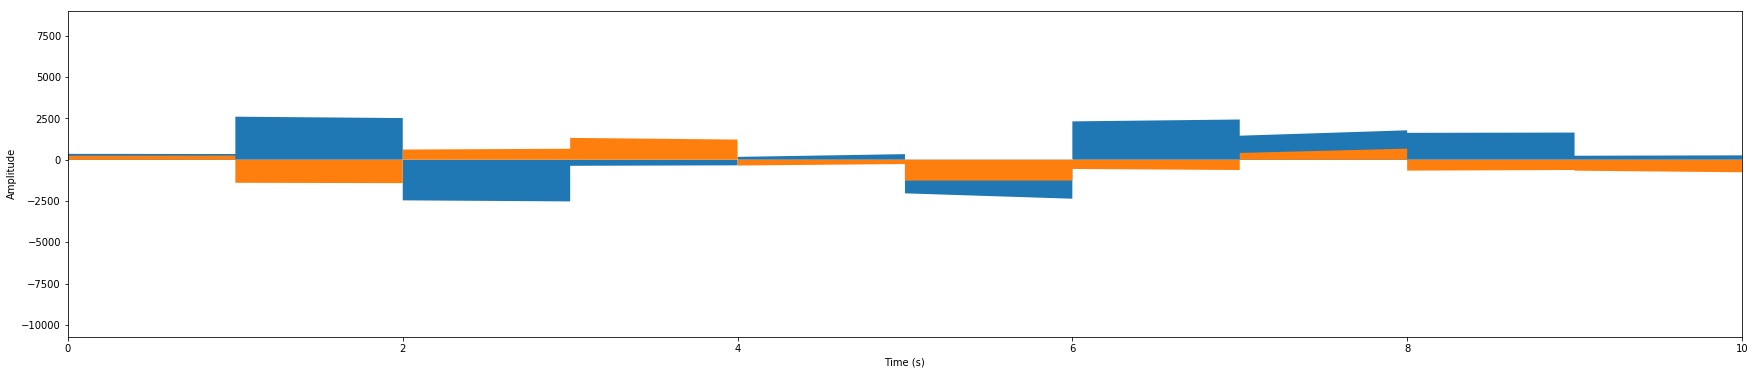

In [114]:
plot_sound(y3, rate)
play_sound(y3, rate)

## Part 8

We can not differenciate the difference on the sources and there is a lot of noise. In the first source we can say the the guitar is separed, however for the second one (the bass) it is quite difficult to differenciate the instrument. For the piano, we have a bigger amplitude for this instrument, however we still hear the guitar. This is because of the angle separation that we have done. We can constate that this division between 0,33 and 0,66 is an approximation that does not separe in the perfect way.

##Part 9

In [127]:
S= np.zeros((F,N,3)) 


for f in range(F):
  for n in range(N):
    for k in range(3):
      S[f,n,k]=Y[f,n,0,k]*np.cos(theta[k])+Y[f,n,1,k]*np.sin(theta[k])

In [128]:
s=imdct(S, framelength=512)

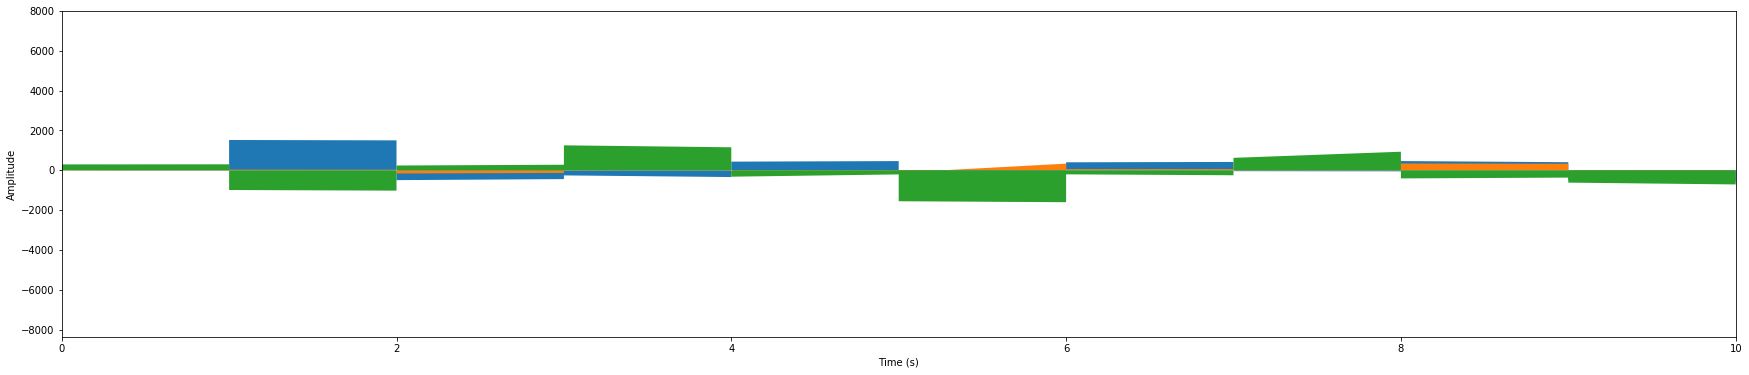

In [131]:
plot_sound(s, rate)
play_sound(s, rate)

## Part 10

In [140]:
S= np.zeros((F,N,3)) 

theta=np.array([-100,0,100])

for f in range(F):
  for n in range(N):
    for k in range(3):
      S[f,n,k]=Y[f,n,0,k]*np.cos(theta[k])+Y[f,n,1,k]*np.sin(theta[k])


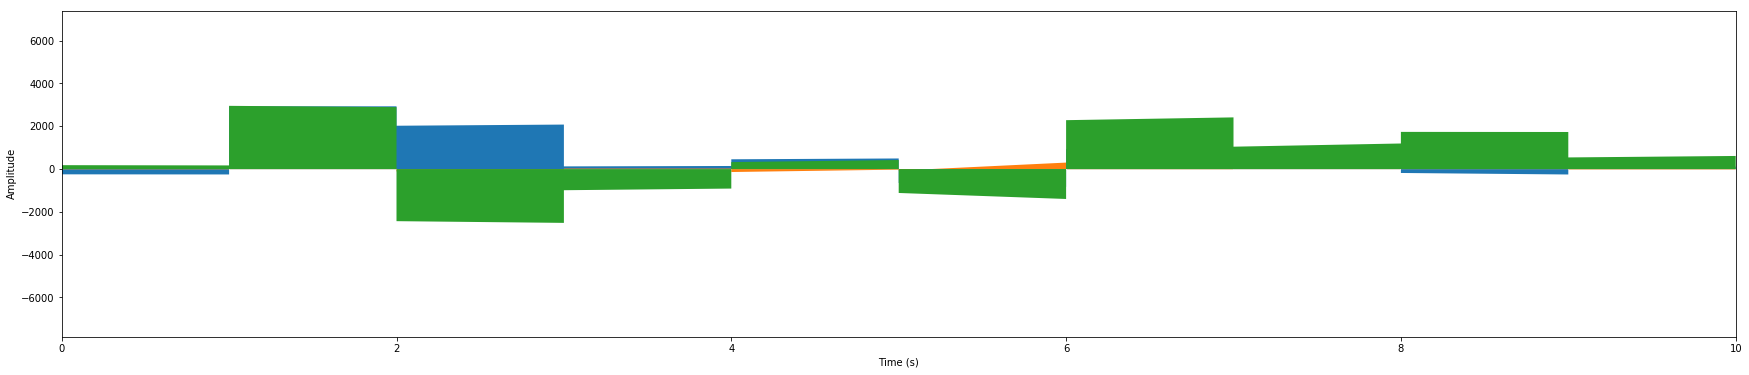

In [141]:
s=imdct(S, framelength=512)
plot_sound(s, rate)
play_sound(s, rate)